### Variables categoricas ordinales

1. Importe los datos del archivo `data.csv`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Bibliotecas
import pandas as pd
import numpy as np
ruta = '/content/drive/MyDrive/Colab Notebooks/'

In [4]:
#Carga los datos en un dataframe
df = pd.read_csv(ruta+'/Tarea 4.2 data.csv')
df.head()

,Escolaridad,No. de hijos
0,Primaria trunca,9
1,Secundaria,3
2,Preparatoria,2
3,Sin escolaridad,3
4,Primaria,2


2. Sustituya ahora la variable categórica por valores resultantes de un polinomio cuadrático estrictamente decreciente.

In [12]:
#@title Vamos a codificar la variable escolaridad
n = len(df['Escolaridad'].unique())

lim = n-1 if n%2 ==0 else (n-1)//2 #Aseguramos división entera
step = 2 if n%2 == 0 else 1 #Con cardinalidad par es de a 2 en 2 y si no de 1 en 1

#Para hacer que siempre sea creciente todas las x son positivas
x = range(0, (2*lim)+1, step)
list(x)

[0, 1, 2, 3, 4]

In [13]:
#Vamos a ordenar la categoría
catego = df['Escolaridad'].unique()
catego

array(['Primaria trunca', 'Secundaria', 'Preparatoria', 'Sin escolaridad',
       'Primaria'], dtype=object)

In [14]:
escolaridad_ord = np.concatenate([[catego[-2]], [catego[0]], [catego[-1]], catego[1:3]])
escolaridad_ord

array(['Sin escolaridad', 'Primaria trunca', 'Primaria', 'Secundaria',
       'Preparatoria'], dtype=object)

In [23]:
#@title codificación cuadrática
a2=1 #Define la forma de la parábola
a1=0
a0=-a2/n*np.sum([i**2 for i in x]) #Hacemos la a0 dependiente de a2 para que siempre sume 0
escolaridad_cuad = {categorías:a0+a1*i+a2*i**2 for categorías, i in zip(escolaridad_ord,x)}
escolaridad_cuad

{'Sin escolaridad': -6.0,
 'Primaria trunca': -5.0,
 'Primaria': -2.0,
 'Secundaria': 3.0,
 'Preparatoria': 10.0}

In [24]:
#La suma debe de ser 0
np.sum(list(escolaridad_cuad.values()))

0.0

In [25]:
#Y ahora hacemos el mapeo
df['escolaridad_cuad'] = df['Escolaridad'].map(escolaridad_cuad)
df.head()

,Escolaridad,No. de hijos,escolaridad_cuad
0,Primaria trunca,9,-5.0
1,Secundaria,3,3.0
2,Preparatoria,2,10.0
3,Sin escolaridad,3,-6.0
4,Primaria,2,-2.0


3. Obtenga una relación lineal usando la clase *LinearRegression* del paquete *sklearn.linear_model*, para la codificacón obtenida y la variable `No. de hijos` y grafique.

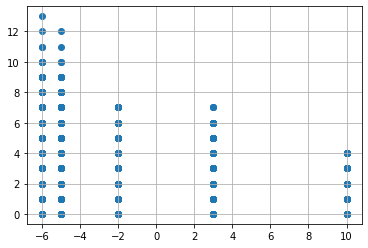

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.scatter(df['escolaridad_cuad'],df['No. de hijos'])
plt.grid()

In [27]:
#Hacemos el entrenamiento de la regresión lineal
lin = LinearRegression()
lin.fit(df[['escolaridad_cuad']], df['No. de hijos'])


LinearRegression()

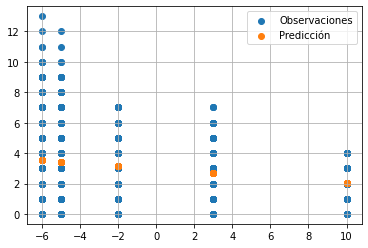

In [28]:
#Graficamos la predicción
f = lin.predict(df[['escolaridad_cuad']])
plt.scatter(df['escolaridad_cuad'],df['No. de hijos'], label='Observaciones')
plt.scatter(df['escolaridad_cuad'],f, label='Predicción')
plt.legend()
plt.grid()